## Final Project Submission

* Student name: **Wendy Kim**
* Student pace: **Part time**
* Scheduled project review date/time: **July 1, 2019 9:30 PM EST**
* Instructor name: **Jeff Herman**
* Blog post URL: **https://wendysjkim.github.io/eda_and_visualization_from_plt_to_folium**


In this project, I will be analyzing house sales data in King County, WA and develop a multi-linear regression model that predicts a housing price based on certain features of the house such as square footage of living space, number of bedrooms, geographical location, etc. The final model will be able to answer business questions such as:

- What is the price range a real estate agent's client should consider for his/her potential new house?
- What should be the basis of property tax valuations?
- Which location or/and budget a company should consider for its new store opening in the city?

In order to be inclusive of all available information in the King County House Sales dataset as much as possible, I will make educated guess for missing values. I will perform EDA to gain better understanding of the dataset. Then, I will account for multicollinearity and develop the prediction model through feature selection. Finally, I will evaluate robustness of the model through cross validation.   

## 1. Import King County House Sales dataset

### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster, FastMarkerCluster, HeatMap
MarkerCluster()

import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import scipy.stats as stats
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [2]:
plt.style.use('ggplot')

### Import the data and create dictionary of column names

In [3]:
# import data
df_raw = pd.read_csv('kc_house_data.csv')
df_raw.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
# Create dictionary of column descriptions
dict = {'id': 'ID',
       'date': 'Date Sold',
       'price': 'Price',
       'bedrooms': 'Number of Bedrooms',
       'bathrooms': 'Number of Bathrooms',
        'sqft_living': 'Square Footage of the House',
        'sqft_lot': 'Square Footage of the Lot', 
        'floors': 'Total Floors in House', 
        'waterfront': 'House With Waterfront View', 
        'view': 'Number of Times Viewed', 
        'condition': 'Condition', 
        'grade': 'Overall Grade',
       'sqft_above': 'Sqaure Footage of House Other Than Basement', 
        'sqft_basement': 'Square Footage of the Basement', 
        'yr_built': 'Built Year', 
        'yr_renovated': 'Renovated Year', 
        'zipcode': 'Zipcode',
        'lat': 'Latitude', 
        'long': 'Longitude', 
        'sqft_living15': 'Living Space Square Footage \nFor Nearest 15 Neighbors', 
        'sqft_lot15':'Land Lots Square Footage \nFor Nearest 15 Neighbors'}

## 2. Explore and Clean the Dataset

### Explore the data

In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [6]:
df_raw.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Check for missing or extraneous data

In [7]:
# Check for duplicates
duplicates = df_raw[df_raw.duplicated()]
print('Number of Duplicates: ',len(duplicates))

Number of Duplicates:  0


In [8]:
# Check for missing values
df_raw.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

`date` is stored as object - should be converted to datetime.
`sqft_basement` is stored as object - should be converted to numeric.
`waterfront`, `view`, and `yr_renovated` seem to have missing values.

The following code checks for extraneous values in each column, which would also provide more information on why `sqft_basement` is stored as an object.

In [9]:
# Check for extraneous values
for col in df_raw.columns:
    print(col, '\n', df_raw[col].value_counts(normalize=True).head(), '\n\n')

id 
 795000620     0.000139
1825069031    0.000093
2019200220    0.000093
7129304540    0.000093
1781500435    0.000093
Name: id, dtype: float64 


date 
 6/23/2014    0.006575
6/25/2014    0.006066
6/26/2014    0.006066
7/8/2014     0.005880
4/27/2015    0.005834
Name: date, dtype: float64 


price 
 350000.0    0.007964
450000.0    0.007964
550000.0    0.007362
500000.0    0.007038
425000.0    0.006945
Name: price, dtype: float64 


bedrooms 
 3    0.454878
4    0.318655
2    0.127796
5    0.074131
6    0.012594
Name: bedrooms, dtype: float64 


bathrooms 
 2.50    0.248970
1.00    0.178312
1.75    0.141131
2.25    0.094782
2.00    0.089364
Name: bathrooms, dtype: float64 


sqft_living 
 1300    0.006390
1400    0.006251
1440    0.006158
1660    0.005973
1010    0.005973
Name: sqft_living, dtype: float64 


sqft_lot 
 5000    0.016576
6000    0.013428
4000    0.011622
7200    0.010187
7500    0.005510
Name: sqft_lot, dtype: float64 


floors 
 1.0    0.494189
2.0    0.381303
1.5    

`sqft_basement` has 0.2% of missing data coded as "?". 

### Clean and deal with missing data

In [10]:
df_raw['date'] = pd.to_datetime(df_raw['date'], format= "%m/%d/%Y") # convert data type for date as datetime

df_raw['sqft_basement'] = df_raw['sqft_basement'].replace("?", np.NaN) # replace ? with NaN
df_raw['sqft_basement'] = pd.to_numeric(df_raw['sqft_basement']) # convert data type as numeric

In [11]:
df_raw['date'].describe()

count                   21597
unique                    372
top       2014-06-23 00:00:00
freq                      142
first     2014-05-02 00:00:00
last      2015-05-27 00:00:00
Name: date, dtype: object

--------------------------------------------
Missing data in column:  waterfront
--------------------------------------------
False    19221
True      2376
Name: waterfront, dtype: int64
False    0.889985
True     0.110015
Name: waterfront, dtype: float64


/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


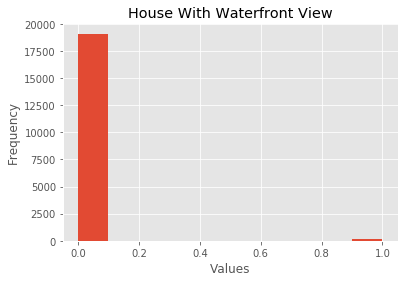


--------------------------------------------
Missing data in column:  view
--------------------------------------------
False    21534
True        63
Name: view, dtype: int64
False    0.997083
True     0.002917
Name: view, dtype: float64


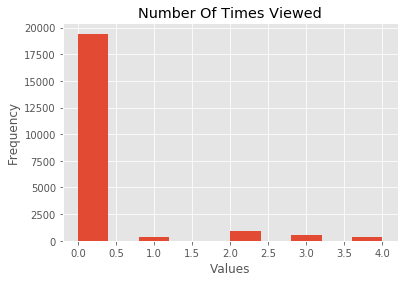


--------------------------------------------
Missing data in column:  yr_renovated
--------------------------------------------
False    17755
True      3842
Name: yr_renovated, dtype: int64
False    0.822105
True     0.177895
Name: yr_renovated, dtype: float64


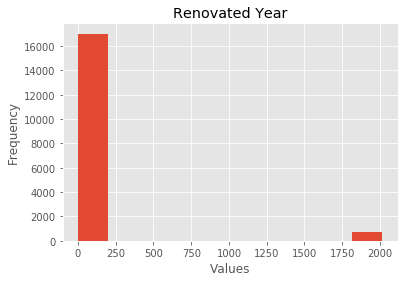


--------------------------------------------
Missing data in column:  sqft_basement
--------------------------------------------
False    21143
True       454
Name: sqft_basement, dtype: int64
False    0.978979
True     0.021021
Name: sqft_basement, dtype: float64


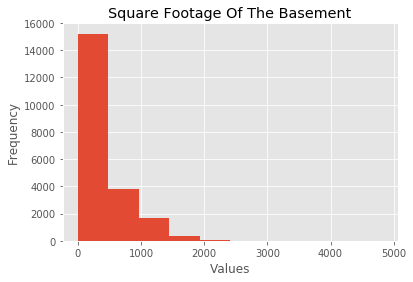

In [12]:
# Check for missing data and distribution of columns with missing data
cols = ['waterfront', 'view', 'yr_renovated', 'sqft_basement']

for col in cols:
    print('--------------------------------------------')
    print('Missing data in column: ',col)
    print('--------------------------------------------')
    print(df_raw[col].isnull().value_counts())
    print(df_raw[col].isnull().value_counts(normalize=True))
    plt.hist(df_raw[col])
    plt.title(dict[col].title())
    plt.ylabel('Frequency')
    plt.xlabel('Values')
    plt.show()
    print()

It seems reasonable to drop `yr_renovated` column, as majority is either 0 or missing.

In [13]:
df_raw['yr_renovated'].value_counts()
df_raw = df_raw.drop(columns='yr_renovated', axis=1)
df_raw.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

For `waterfront` and `view` variables, the missing values account for 11% and 0.2%, respectively. I will assign random values to the missing values based on the columns' current distribution. 

In [14]:
def fillna_dist(col):
    '''
    Fills missing values by assigning random values based on a given probability.
    '''
    dist = df_raw[col].value_counts(normalize=True)
    print('--------------------------------------------')
    print('Filling in missing values for: ', col)
    print('--------------------------------------------')
    print('Original value counts: ')
    print(df_raw[col].value_counts())
    
    dist_prob = list(dist)
    dist_index = list(dist.index)
    df_raw[col] = df_raw[col].fillna(np.random.choice(dist_index, p=dist_prob))
    
    print('Updated value counts: ')
    print(df_raw[col].value_counts())

In [15]:
fillna_dist('waterfront')
fillna_dist('view')

--------------------------------------------
Filling in missing values for:  waterfront
--------------------------------------------
Original value counts: 
0.0    19075
1.0      146
Name: waterfront, dtype: int64
Updated value counts: 
0.0    21451
1.0      146
Name: waterfront, dtype: int64
--------------------------------------------
Filling in missing values for:  view
--------------------------------------------
Original value counts: 
0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64
Updated value counts: 
0.0    19485
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64


For `sqft_living` variable seems to be the sum of `sqft_above` and `sqft_basement` variables. Since `sqft_living` and `sqft_above` variables don't have null values, missing values in `sqft_basement` can be filled in. 

In [16]:
# sanity check (sqft_living = sqft_above + sqft_basement) holds true
df_raw['sqft_test'] = (df_raw['sqft_living'] == (df_raw['sqft_above'] + df_raw['sqft_basement']))
print('sqft_test: \n',df_raw['sqft_test'].value_counts()) 
print('---------------------')
print('sqft_test is FALSE & sqft_basement is null: \n',
      df_raw.loc[(df_raw['sqft_test'] == False) &(df_raw['sqft_basement'].isna() == False)]) # should return empty dataframe

# fill missing values in sqft_basement column with the difference between sqft_living and sqft_above
df_raw['sqft_basement'] = df_raw['sqft_basement'].fillna(df_raw['sqft_living'] - df_raw['sqft_above'])
print('---------------------')
print('sqft_basement: \n',df_raw['sqft_basement'].value_counts())
print('---------------------')
print('sqft_test is FALSE: \n', df_raw['sqft_basement'].loc[(df_raw['sqft_test'] == False)])

# drop sqft_test column
df_raw = df_raw.drop(columns='sqft_test', axis=1)

sqft_test: 
 True     21143
False      454
Name: sqft_test, dtype: int64
---------------------
sqft_test is FALSE & sqft_basement is null: 
 Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, zipcode, lat, long, sqft_living15, sqft_lot15, sqft_test]
Index: []

[0 rows x 21 columns]
---------------------
sqft_basement: 
 0.0       13110
600.0       221
700.0       218
500.0       214
800.0       206
400.0       184
1000.0      149
900.0       144
300.0       142
200.0       108
530.0       107
480.0       106
750.0       105
450.0       103
720.0       102
620.0        91
580.0        85
840.0        85
420.0        81
860.0        80
1100.0       80
670.0        79
780.0        77
380.0        76
550.0        76
850.0        76
650.0        76
680.0        75
240.0        74
360.0        73
          ...  
2610.0        1
2600.0        1
283.0         1
2850.0        1
1

### Deal with Categorical Variables

Create dummy variables for categorical variables such as `waterfront` and `zipcode`. I didn't create dummy variables for ordinal variables, such as `condition` and `grade`.

In [17]:
# categorical variables
def dummies(data, cols):
    '''
    create dummy variables for categorical variables in a given list
    '''
    cols_dummies = pd.DataFrame() 
    for col in cols:
        dummy = pd.get_dummies(data[col], prefix=col)
        cols_dummies = pd.concat([cols_dummies, dummy], axis=1)
    return cols_dummies

In [18]:
cols = ['waterfront']
dummies(data=df_raw, cols=cols).head()

,waterfront_0.0,waterfront_1.0
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [19]:
df_raw['zipcode'].nunique()

70

For `zipcode`, there are 70 unique zipcodes - which would significantly increase the number of predictor variables. Therefore, instead of creating dummy variables, I decided to create an oridnal variable called `neighborhood`. The idea is that I would take zipcode and median housing price within each zipcode to decide which neighborhoods are more "expensive" and which are more "cheap".

In [20]:
def create_neighborhood(data, n, col):
    '''
    Creates an oridinal variable ranging from 1 to n, by calculating median value of specified column of each zipcode.
    For example, if n=10 and col='price', zipcode whose median price 
    falls within top 10% of entire housing price would have value of 10. Similarly, 
    zipcode whose median price falls within bottom 10% of entire housing price would have value of 1.
    '''
    zipcode = pd.DataFrame(data[col].groupby(data['zipcode']).median().sort_values(ascending=False).reset_index())
    zipcode = zipcode.rename(columns={col: 'median'})
    zipcode['neighborhood'] = 0
    
    i = 1
    while i <= n:
        criteria_low = data[col].quantile((i-1)/n)
        criteria_high = data[col].quantile(i/n)
        row = zipcode[(zipcode['median'] >= criteria_low) & (zipcode['median'] < criteria_high)].index
        zipcode.loc[row, 'neighborhood'] = i
        i += 1
    
    zipcode = zipcode.drop(['median'], axis=1)
    return zipcode

In [21]:
neighborhood=create_neighborhood(data=df_raw, n=10, col='price')
neighborhood.head(n=10)

,zipcode,neighborhood
0,98039,10
1,98004,10
2,98040,10
3,98112,10
4,98005,9
5,98006,9
6,98119,9
7,98075,9
8,98109,9
9,98102,9


Using the `create_neighborhood` function, I classified each zipcodes into 10 neighborhoods, with 1 being the chapest neighborhood and 10 being the most expensive neighborhood.

Then, merge the neighborhood information by left joining the `neighborhood` dataframe with the original `df_raw` dataframe on `zipcode` column.

In [22]:
df_raw = pd.merge(df_raw, neighborhood, on='zipcode', how='left')
df_raw.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'neighborhood'],
      dtype='object')

In [23]:
df_raw.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,neighborhood
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650,2
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639,5
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062,5
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000,6
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503,8


Additionally, I created buckeets for prices based on quantiles (deciles). This variable will be used to create heat map in the data visulization section below. 

In [24]:
df_raw['price_q'] = pd.qcut(df_raw['price'], 10, labels=False) + 1
df_raw[['price','price_q', 'neighborhood']].head()

,price,price_q,neighborhood
0,221900.0,1,2
1,538000.0,7,5
2,180000.0,1,5
3,604000.0,8,6
4,510000.0,6,8


### Check for outliers

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c26c96048>,
      dtype=object)

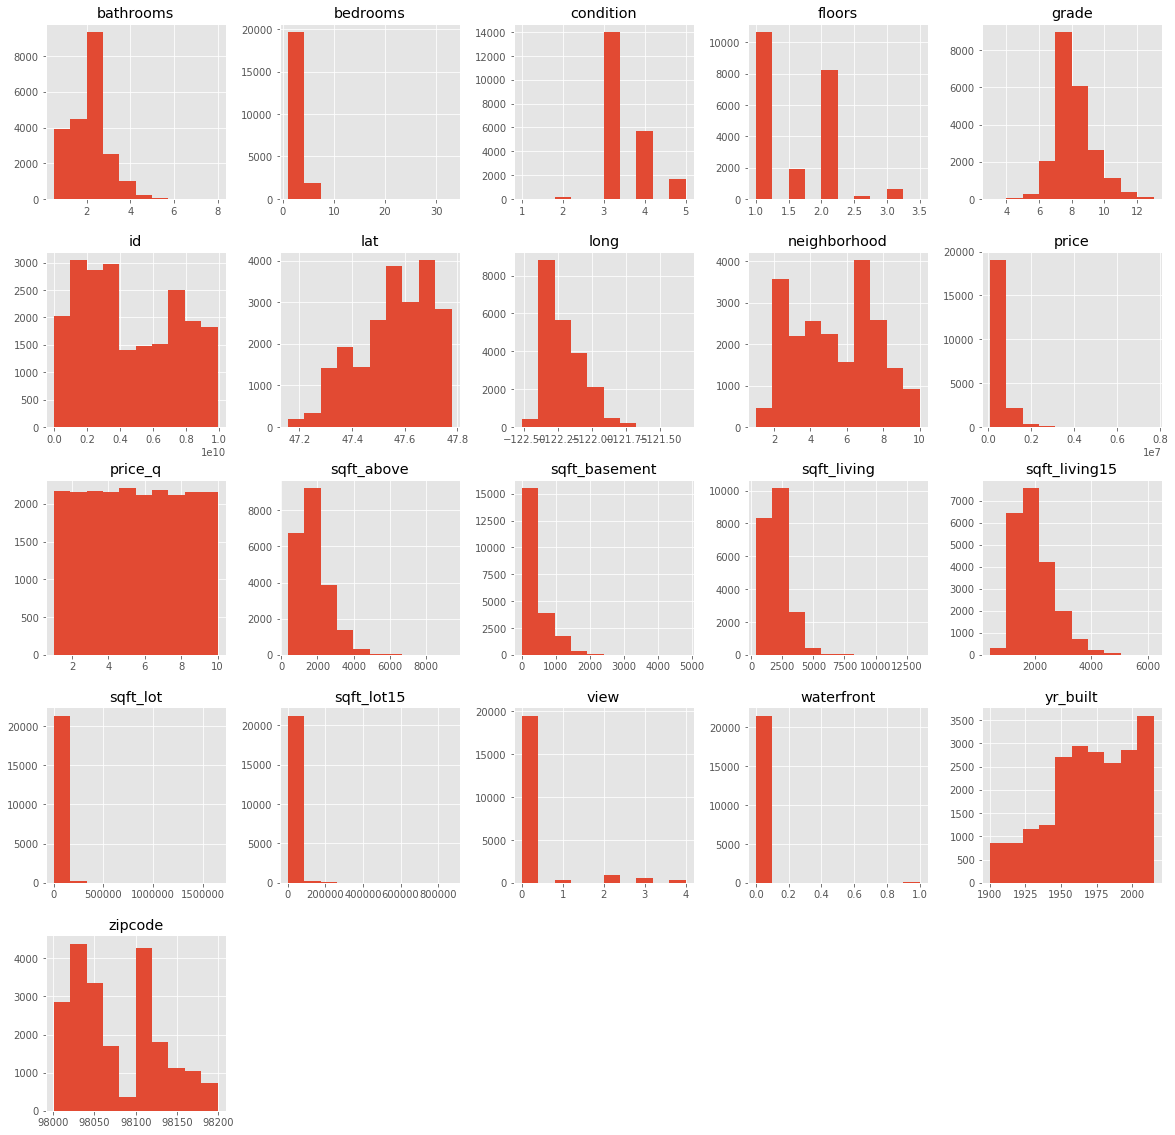

In [25]:
df_raw.hist(figsize=(20,20))

In [26]:
len(df_raw)

21597

It seems like there are outliers in many of the variables, skewing the distributions to the right. Therefore, I decided to look at a subset of the data where `price` falls in the middle 70% from 15th to 85th percentile.  

In [27]:
print(df_raw['price'].quantile(.15), df_raw['price'].quantile(.85))

270000.0 779721.9999999991


In [28]:
df = df_raw.loc[(df_raw['price'] <= df_raw['price'].quantile(.85)) & 
            (df_raw['price'] >= df_raw['price'].quantile(.15))]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c28178940>,
      dtype=object)

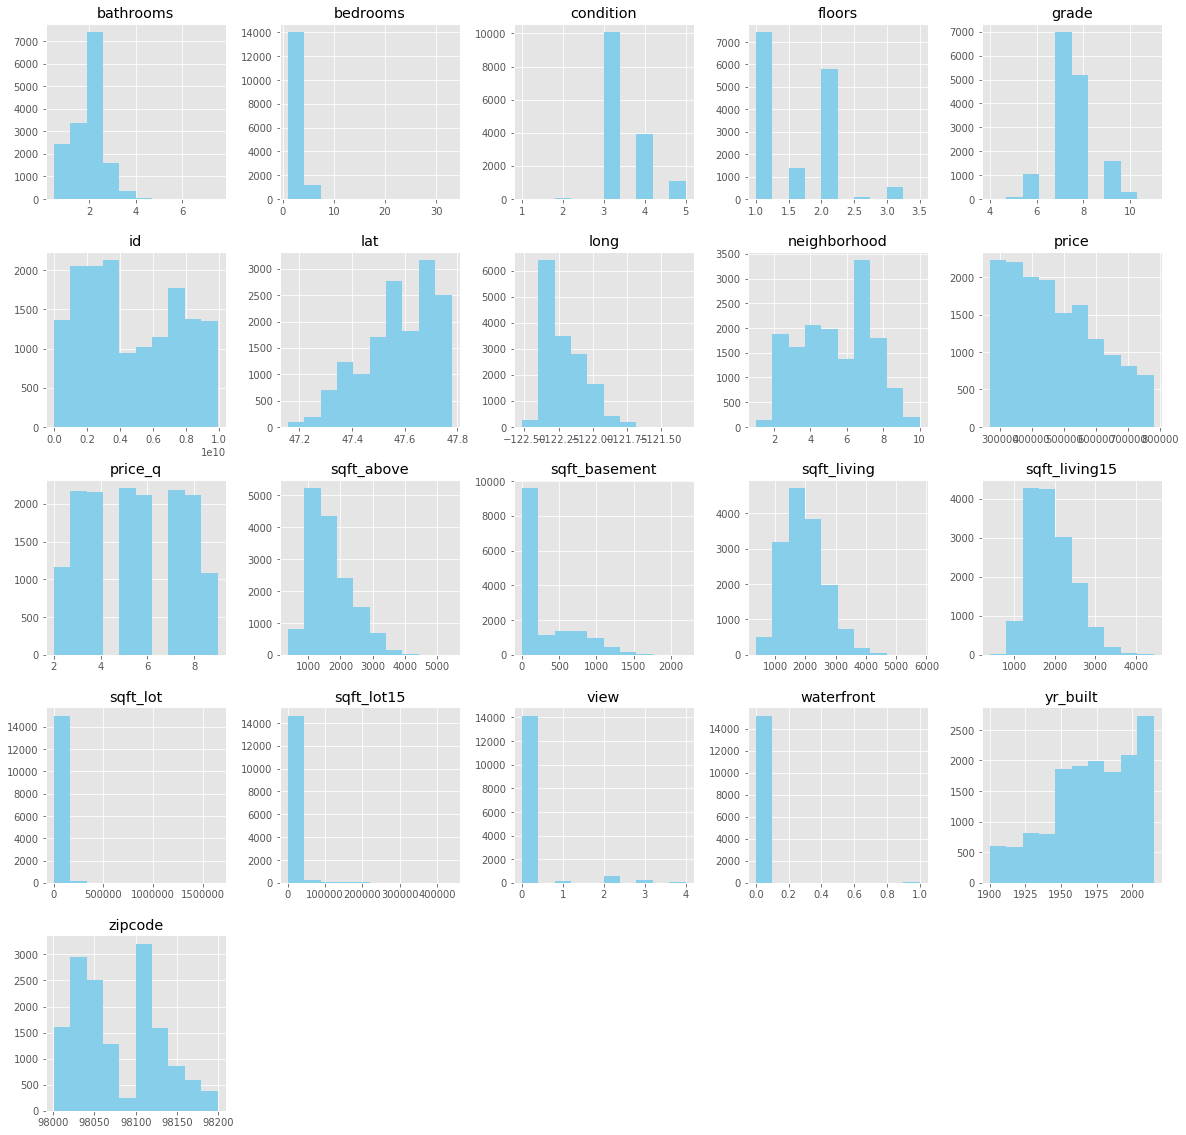

In [29]:
df.hist(figsize=(20,20), color='skyblue')

In [30]:
len(df)

15206

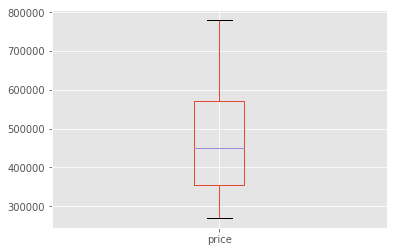

In [31]:
df.boxplot(column='price')

Even when looking at the subset where houses are valued in the middle 70%, there are outliers skewing the distribution of some variables. Based on the histograms above, I further accounted for some outliers that skew the distributions.

In [32]:
def outlier(data, cols):
    '''
    Calculate upper and lower bounds of outliers of given variables in a list
    '''
    outliers = {}
    for col in cols:
        q1 = data[col].quantile(.25)
        q3 = data[col].quantile(.75)
        outlier = (q3 - q1)*1.5
        outlier_low = q1 - outlier
        outlier_high = q3 + outlier
        outliers[col] = (outlier_low, outlier_high)
    return outliers

In [33]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'neighborhood', 'price_q'],
      dtype='object')

In [34]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,neighborhood,price_q
count,1.520600e+04,15206.000000,15206.000000,15206.000000,15206.000000,1.520600e+04,15206.000000,15206.000000,15206.000000,15206.000000,...,15206.000000,15206.000000,15206.000000,15206.000000,15206.000000,15206.000000,15206.000000,15206.000000,15206.000000,15206.000000
mean,4.648033e+09,471865.011640,3.342168,2.079294,1967.631461,1.440191e+04,1.502302,0.002170,0.152834,3.395173,...,1692.557806,275.073655,1972.049915,98080.031369,47.576729,-122.211400,1916.317967,12406.523017,5.403985,5.472905
std,2.877052e+09,135786.004796,0.906431,0.656404,675.125140,3.822991e+04,0.548468,0.046536,0.593886,0.632373,...,657.300656,402.974675,29.502972,50.797121,0.134924,0.146016,538.965936,26278.303876,2.204496,2.070896
min,1.000102e+06,270000.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,370.000000,0.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,1.000000,2.000000
25%,2.206700e+09,355000.000000,3.000000,1.750000,1470.000000,4.815000e+03,1.000000,0.000000,0.000000,3.000000,...,1200.000000,0.000000,1952.000000,98034.000000,47.490500,-122.335000,1510.000000,4950.000000,4.000000,4.000000
50%,3.961901e+09,450000.000000,3.000000,2.250000,1900.000000,7.280000e+03,1.500000,0.000000,0.000000,3.000000,...,1540.000000,0.000000,1977.000000,98072.000000,47.588500,-122.231000,1830.000000,7350.000000,5.000000,5.000000
75%,7.365975e+09,570000.000000,4.000000,2.500000,2390.000000,1.015675e+04,2.000000,0.000000,0.000000,4.000000,...,2090.000000,540.000000,1998.000000,98118.000000,47.689700,-122.118000,2260.000000,9750.000000,7.000000,7.000000
max,9.895000e+09,779380.000000,33.000000,7.500000,5774.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,5450.000000,2196.000000,2015.000000,98199.000000,47.777600,-121.321000,4440.000000,438213.000000,10.000000,9.000000


In [35]:
outlier_check = ['bathrooms', 'bedrooms', 'sqft_living', 'sqft_lot', 
                  'floors','grade', 'condition', 'sqft_above', 'sqft_basement', 
                  'yr_built', 'sqft_living15', 'sqft_lot15',
                  'lat', 'long']

outlier(df, outlier_check)

{'bathrooms': (0.625, 3.625),
 'bedrooms': (1.5, 5.5),
 'sqft_living': (90.0, 3770.0),
 'sqft_lot': (-3197.625, 18169.375),
 'floors': (-0.5, 3.5),
 'grade': (5.5, 9.5),
 'condition': (1.5, 5.5),
 'sqft_above': (-135.0, 3425.0),
 'sqft_basement': (-810.0, 1350.0),
 'yr_built': (1883.0, 2067.0),
 'sqft_living15': (385.0, 3385.0),
 'sqft_lot15': (-2250.0, 16950.0),
 'lat': (47.19169999999999, 47.98850000000001),
 'long': (-122.66049999999998, -121.79249999999999)}

In [36]:
def remove_outlier(data, outlier_columns):
    '''
    Removes outliers of specified columns in a given dataframe
    '''
    outliers = outlier(data, outlier_columns) 
    for col in outliers:
        data = data.loc[(data[col] >= outliers[col][0]) & (data[col] <= outliers[col][1])]
    return data

In [37]:
df = remove_outlier(df, outlier_check)
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,neighborhood,price_q
count,1.245600e+04,12456.000000,12456.000000,12456.000000,12456.000000,12456.000000,12456.000000,12456.000000,12456.000000,12456.000000,...,12456.000000,12456.000000,12456.000000,12456.000000,12456.000000,12456.000000,12456.000000,12456.000000,12456.00000,12456.000000
mean,4.798366e+09,462841.273603,3.279544,2.034040,1860.230893,6764.857338,1.506503,0.000562,0.123475,3.398362,...,1603.719252,256.511641,1971.270392,98083.921965,47.586968,-122.232384,1837.892020,6666.888648,5.45183,5.342967
std,2.857595e+09,132227.392161,0.773748,0.623438,572.749280,3362.732108,0.559970,0.023700,0.521100,0.632159,...,579.693176,365.532180,30.468639,51.140366,0.128957,0.128908,480.346119,3018.286106,2.18559,2.039451
min,3.600057e+06,270000.000000,2.000000,0.750000,610.000000,520.000000,1.000000,0.000000,0.000000,2.000000,...,490.000000,0.000000,1900.000000,98001.000000,47.192300,-122.503000,670.000000,651.000000,1.00000,2.000000
25%,2.450000e+09,350000.000000,3.000000,1.750000,1430.000000,4436.500000,1.000000,0.000000,0.000000,3.000000,...,1170.000000,0.000000,1950.000000,98034.000000,47.514600,-122.342000,1470.000000,4532.000000,4.00000,4.000000
50%,4.058802e+09,440000.000000,3.000000,2.250000,1820.000000,6600.000000,1.500000,0.000000,0.000000,3.000000,...,1470.000000,0.000000,1975.000000,98092.000000,47.603600,-122.273000,1770.000000,6600.000000,6.00000,5.000000
75%,7.510275e+09,555000.000000,4.000000,2.500000,2250.000000,8728.000000,2.000000,0.000000,0.000000,4.000000,...,1950.000000,510.000000,2000.000000,98119.000000,47.691825,-122.150000,2150.000000,8500.000000,7.00000,7.000000
max,9.895000e+09,779380.000000,5.000000,3.500000,3760.000000,18150.000000,3.500000,1.000000,4.000000,5.000000,...,3420.000000,1350.000000,2015.000000,98199.000000,47.777600,-121.797000,3380.000000,16943.000000,10.00000,9.000000


In [38]:
len(df)

12456

In [39]:
(15206-12456)/(15206) # outliers accounted for 18% of df

0.18084966460607654

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c2a2c5978>,
      dtype=object)

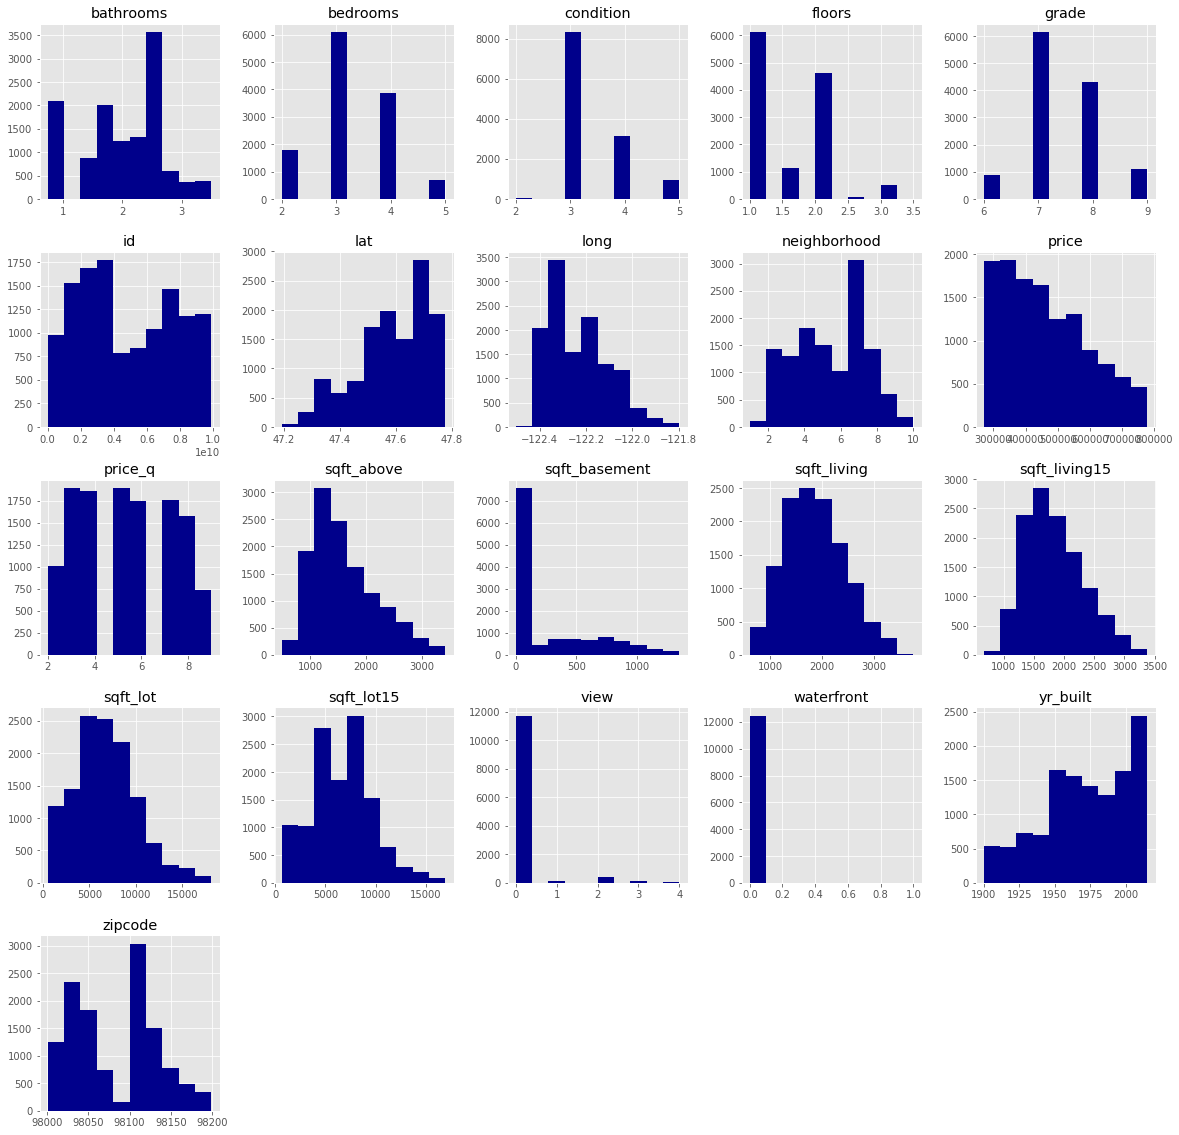

In [40]:
df.hist(figsize=(20,20), color='darkblue')

## 3. Data Visualization

### A. What is the relationship between square footage of a home and that of houses in nearby neighborhoods?

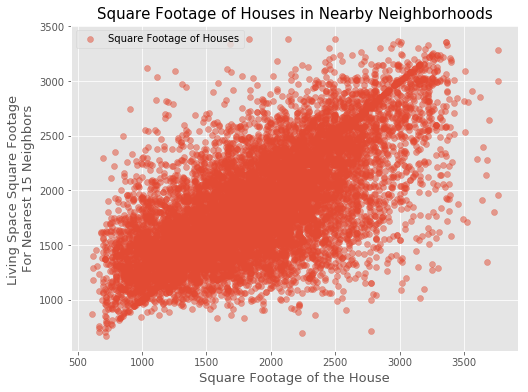

In [41]:
plt.figure(figsize=(8,6))
plt.scatter(x=df['sqft_living'], y=df['sqft_living15'], alpha=0.5, label='Square Footage of Houses')

plt.legend()
plt.title('Square Footage of Houses in Nearby Neighborhoods', fontsize=15)
plt.xlabel(dict['sqft_living'], fontsize=13)
plt.ylabel(dict['sqft_living15'], fontsize=13)
plt.show()

Square footage of living space in a house is positively correlated with square footage of living spaces in nearest 15 neighborhood. 

### B. Does higher number of bedrooms necessarily mean higher number of bathrooms?

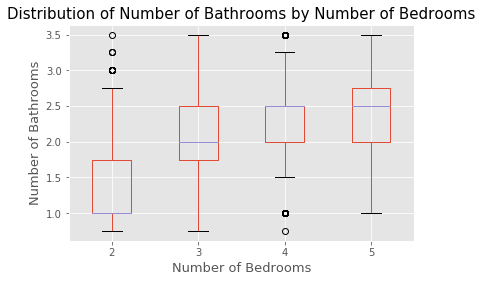

In [42]:
df.boxplot(column='bathrooms', by ='bedrooms')
plt.suptitle('')
plt.title('Distribution of Number of Bathrooms by Number of Bedrooms', fontsize=15)
plt.xlabel(dict['bedrooms'], fontsize=13)
plt.ylabel(dict['bathrooms'], fontsize=13)
plt.show()

The above boxplot shows that number of bedrooms and number of bathrooms are positively correlated -- the more number of bedrooms there are in a house, it is more likely to be higher humber of bathrooms in the house. Yet, as the number of bedrooms increase, the median number of bathrooms of the house does not increase as much. In other words, although houses with more bedrooms are more likely to have more bathrooms, houses have equal or less number of bathrooms than bedrooms on average.

### C. What is the relationship between square footage of a home and its price?

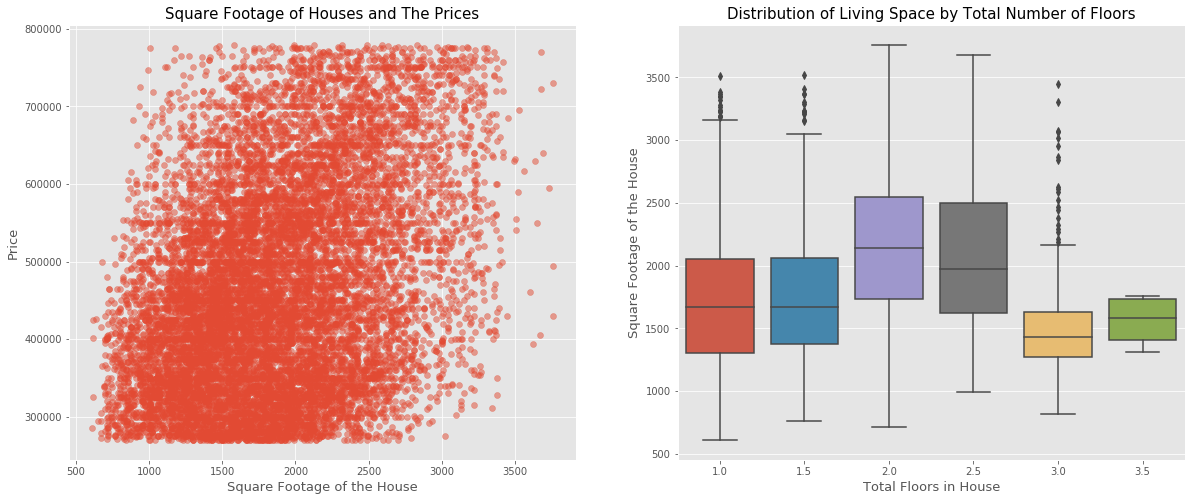

In [43]:
fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize = (20,8))

# sqft_living vs. price
ax1 = plt.subplot(1, 2, 1)
plt.scatter(x=df['sqft_living'], y=df['price'], alpha=0.5)
plt.title('Square Footage of Houses and The Prices', fontsize=15)
plt.xlabel(dict['sqft_living'], fontsize=13)
plt.ylabel(dict['price'], fontsize=13)

# sqft_living vs. floors
ax2 = plt.subplot(1, 2, 2)
sns.boxplot(x='floors', y='sqft_living', data=df)
plt.title('Distribution of Living Space by Total Number of Floors', fontsize=15)
plt.xlabel(dict['floors'], fontsize=13)
plt.ylabel(dict['sqft_living'], fontsize=13)

plt.show()

It is not surprising that square footage of living space and housing prices have some positive correlation, as shown in the scatterplot on the left. Yet, the relationship between the square footage of living space and total number of floors in the house is pretty interesting. The boxplot on the right shows that having higher number of floors doesn't necessarily mean the house has bigger living space. In fact, the median square footage of living space does not vary much by the number of floors in the house.

### D. What is the relationship between housing prices and geographical locations?

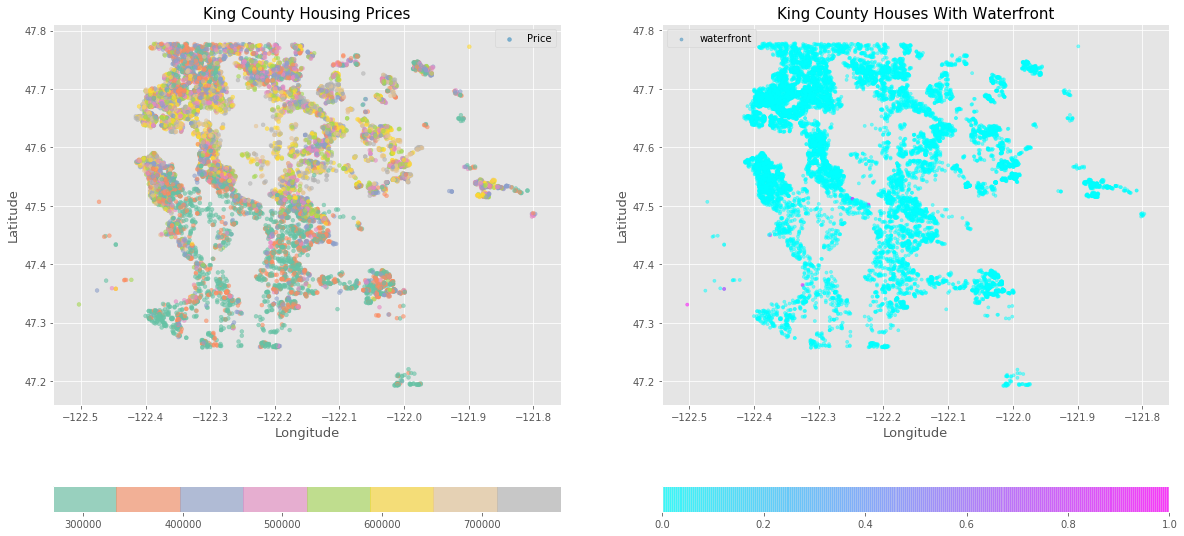

In [44]:
fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize = (20,10))

# housing price
ax1 = plt.subplot(1, 2, 1)
plt.scatter(df['long'], df['lat'], c=df['price'], s=15, cmap='Set2', alpha=0.6, label='Price')
plt.title('King County Housing Prices', fontsize=15)
plt.xlabel('Longitude', fontsize=13)
plt.ylabel('Latitude', fontsize=13)
plt.legend()
plt.colorbar(orientation="horizontal")

# waterfront
ax2 = plt.subplot(1, 2, 2)
plt.scatter(df['long'], df['lat'], c=df['waterfront'], s=10, cmap='cool', alpha=0.5, label='waterfront')
plt.title('King County Houses With Waterfront', fontsize=15)
plt.xlabel('Longitude', fontsize=13)
plt.ylabel('Latitude', fontsize=13)
plt.legend()
plt.colorbar(orientation="horizontal")

plt.show()

It looks like geographical location plays a significant impact on the housing prices in King County. The subplot on the left shows housing prices based on the longitude and latitude of each houses. The subplot on the right shows whether these houses have waterfront view or not. It seems not many houses within middle 70% have waterfront views.

The violinplot of housing prices grouped by `waterfront` variable below confirms this observation. The median price is higher for those with waterfront view. Also, the distribution is more spread out and skewed to the right for those houses without waterfront view. 

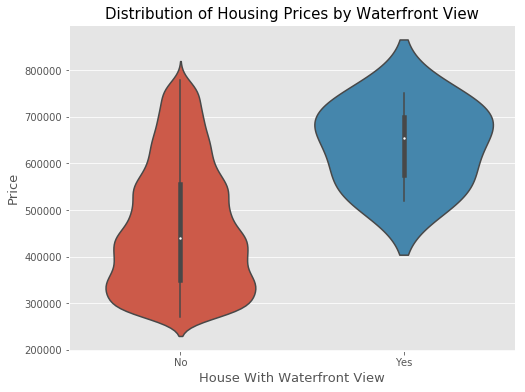

In [51]:
plt.figure(figsize=(8,6))
sns.violinplot(y='price', x ='waterfront', data=df)

plt.title('Distribution of Housing Prices by Waterfront View', fontsize=15)
plt.xlabel(dict['waterfront'], fontsize=13)
plt.xticks(ticks=(0, 1), labels=["No", "Yes"])
plt.ylabel(dict['price'], fontsize=13)
plt.show()

In fact, this information could be more easily interpreted if the data was plotted on an actual map. Below, I use the folium library to generate a heat map based on the prices.

In [52]:
locations = df[['lat','long']]
locationlist = locations.values.tolist()

map_start = locationlist[len(locationlist) //2]
len(locationlist)

12456

In [53]:
map1 = folium.Map(location = map_start, tiles='CartoDB positron', control_scale=True,zoom_start=9)
# add all points from the dataset to the map usig FastMarkerCluster

marker_cluster = map1.add_child(FastMarkerCluster(locationlist))
map1.add_child(HeatMap(df[['lat','long','price_q']].values, radius=15))

map1

In [54]:
#map1.save('map.html')

In [51]:
# add markers with price
# note: slows down the jupyter notebook 
# for point in range(len(locationlist)):
#     folium.CircleMarker(locationlist[point], tooltip=df['price'][point], radius=0.11).add_to(marker_cluster)
# map1

## 4. Modeling

### Create `df_predictors` dataframe for feature selection

Create dataframe with the independent variables.

In [55]:
cols=['waterfront']

df_predictors = df.drop(['id','date','price','waterfront', 'zipcode', 'price_q'], axis=1)
df_predictors = pd.concat([df_predictors, dummies(df, cols)], axis=1)
df_predictors.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,neighborhood,waterfront_0.0,waterfront_1.0
1,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,47.7210,-122.319,1690,7639,5,1,0
3,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,47.5208,-122.393,1360,5000,6,1,0
4,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,47.6168,-122.045,1800,7503,8,1,0
7,3,1.50,1060,9711,1.0,0.0,3,7,1060,0.0,1963,47.4095,-122.315,1650,9711,2,1,0
9,3,2.50,1890,6560,2.0,0.0,3,7,1890,0.0,2003,47.3684,-122.031,2390,7570,3,1,0


In [56]:
df_predictors.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'lat',
       'long', 'sqft_living15', 'sqft_lot15', 'neighborhood', 'waterfront_0.0',
       'waterfront_1.0'],
      dtype='object')

### Correlation

Before moving on to feature selection, I will first investigation correlation between the variables and remove those with absolute correlation higher than 0.75 to account for multicollinearity.

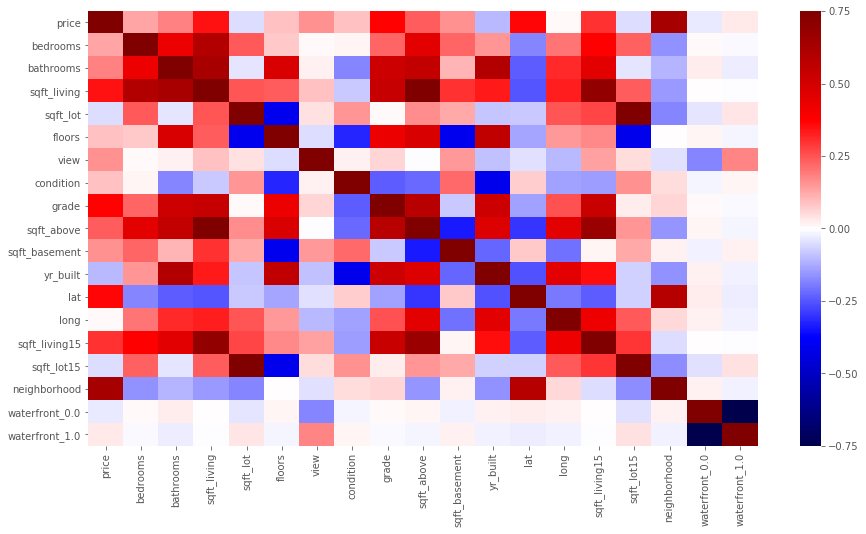

In [57]:
plt.figure(figsize=(15,8))
corr_test = pd.concat([df['price'], df_predictors], axis=1)
sns.heatmap(corr_test.corr(), vmin=-0.75, vmax=0.75, center=0, cmap='seismic');

In [58]:
test = abs(corr_test.corr()) > 0.75

In [59]:
print(f"{'Column':<18} *  {'Correlated Columns':<30}")
print(str('*')*80)
for i in list(test.columns):
    corr_col = []
    for x in list(test.loc[test[i] == True].index):
      if x != i:
          corr_col.append(x)
    if corr_col == []:
      corr_col = ''
    print(f'{i:<18} * {str(corr_col):<30}')

Column             *  Correlated Columns            
********************************************************************************
price              *                               
bedrooms           *                               
bathrooms          *                               
sqft_living        * ['sqft_above']                
sqft_lot           * ['sqft_lot15']                
floors             *                               
view               *                               
condition          *                               
grade              *                               
sqft_above         * ['sqft_living']               
sqft_basement      *                               
yr_built           *                               
lat                *                               
long               *                               
sqft_living15      *                               
sqft_lot15         * ['sqft_lot']                  
neighborhood       *              

In [60]:
# columns to drop
drop_col = ['sqft_above', 'sqft_lot15', 'waterfront_0.0']

### Feature selection

In [61]:
df_target = df['price']

In [62]:
# min-max scaling for feature selection
scaler = preprocessing.MinMaxScaler()

df_predictors = df_predictors.drop(drop_col, axis=1) ## drop correlated columns

# columns to log_transform
log_col = [] # I decided to not perform log transformation

df_log = df_predictors.drop(log_col, axis=1)
for col in log_col:
    df_log[col] = np.log(df_predictors[col])
    df_log = df_log.rename(columns={col: f'{col}_log'})
    
df_log.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_basement,yr_built,lat,long,sqft_living15,neighborhood,waterfront_1.0
1,3,2.25,2570,7242,2.0,0.0,3,7,400.0,1951,47.7210,-122.319,1690,5,0
3,4,3.00,1960,5000,1.0,0.0,5,7,910.0,1965,47.5208,-122.393,1360,6,0
4,3,2.00,1680,8080,1.0,0.0,3,8,0.0,1987,47.6168,-122.045,1800,8,0
7,3,1.50,1060,9711,1.0,0.0,3,7,0.0,1963,47.4095,-122.315,1650,2,0
9,3,2.50,1890,6560,2.0,0.0,3,7,0.0,2003,47.3684,-122.031,2390,3,0


In [63]:
df_scaled = scaler.fit_transform(df_log)
df_scaled = pd.DataFrame(df_scaled, columns=df_log.columns)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [64]:
# df_scaled.head()
df_scaled.describe() # sanity check the scaled results

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_basement,yr_built,lat,long,sqft_living15,neighborhood,waterfront_1.0
count,12456.000000,12456.000000,12456.000000,12456.000000,12456.000000,12456.000000,12456.000000,12456.000000,12456.000000,12456.000000,12456.000000,12456.000000,12456.000000,12456.000000,12456.000000
mean,0.426515,0.466924,0.396899,0.354218,0.202601,0.030869,0.466121,0.484077,0.190009,0.619743,0.674301,0.383309,0.430956,0.494648,0.000562
std,0.257916,0.226705,0.181825,0.190739,0.223988,0.130275,0.210720,0.251488,0.270765,0.264945,0.220326,0.182589,0.177249,0.242843,0.023700
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.363636,0.260317,0.222150,0.000000,0.000000,0.333333,0.333333,0.000000,0.434783,0.550658,0.228045,0.295203,0.333333,0.000000
50%,0.333333,0.545455,0.384127,0.344867,0.200000,0.000000,0.333333,0.333333,0.000000,0.652174,0.702717,0.325779,0.405904,0.555556,0.000000
75%,0.666667,0.636364,0.520635,0.465570,0.400000,0.000000,0.666667,0.666667,0.377778,0.869565,0.853451,0.500000,0.546125,0.666667,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [65]:
# feature selection loop
linreg = LinearRegression()

results_adjrsq = {}
results_cols = {}
results_added = {}

for n in range(1,len(df_scaled.columns)+1):
    selector = RFE(linreg, n_features_to_select= n) # select n features using scaled data
    selector = selector.fit(df_scaled, df_target)

    selected_columns = df_log.columns[selector.support_] # identify selected features in the non-scaled data

    X_fin = np.asarray(df_log[selected_columns]) # run multi-liner regression
    X_int = sm.add_constant(X_fin)
    model = sm.OLS(df_target, X_int).fit()

    rsq_adj = model.rsquared_adj # save selected columns and their adjusted r squared
    results_adjrsq[n] = rsq_adj
    results_cols[n] = str(list(selected_columns))
    if n == 1:
        results_added[n] = str(set(eval(results_cols[n])))
    else:
        results_added[n] = str(set(eval(results_cols[n])) - set(eval(results_cols[n-1])))
        
# combine and convert the results into panadas dataframe
results1 = pd.DataFrame.from_dict(results_adjrsq, orient='index', columns=['adj_rsq']) 
results2 = pd.DataFrame.from_dict(results_cols, orient='index', columns=['features'])
results3 = pd.DataFrame.from_dict(results_added, orient='index', columns=['features_added'])

results = pd.concat([results1, results2, results3], axis=1).reset_index().rename(columns={'index':'num_features'})

In [66]:
results

,num_features,adj_rsq,features,features_added
0,1,0.405319,['neighborhood'],{'neighborhood'}
1,2,0.602788,"['sqft_living', 'neighborhood']",{'sqft_living'}
2,3,0.605041,"['sqft_living', 'neighborhood', 'waterfront_1.0']",{'waterfront_1.0'}
3,4,0.615490,"['sqft_living', 'grade', 'neighborhood', 'wate...",{'grade'}
4,5,0.664119,"['sqft_living', 'grade', 'yr_built', 'neighbor...",{'yr_built'}
5,6,0.675930,"['sqft_living', 'view', 'grade', 'yr_built', '...",{'view'}
6,7,0.687586,"['sqft_living', 'view', 'grade', 'yr_built', '...",{'long'}
7,8,0.689695,"['sqft_living', 'view', 'grade', 'yr_built', '...",{'sqft_living15'}
8,9,0.693065,"['sqft_living', 'view', 'grade', 'yr_built', '...",{'lat'}
9,10,0.696553,"['sqft_living', 'view', 'condition', 'grade', ...",{'condition'}


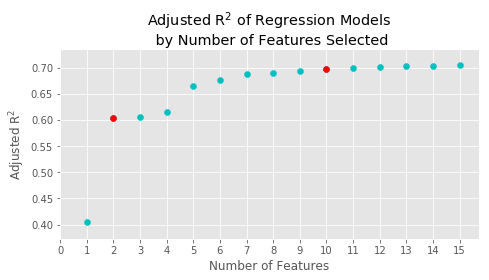

In [68]:
# Visualize feature selection results
fs_x = results['num_features']
fs_y = results['adj_rsq']
red = [1,9] # row index of points to color red

plt.figure(figsize=(7.5,3.5))
plt.scatter(fs_x, fs_y, c='c')
plt.scatter([fs_x[i] for i in red], [fs_y[i] for i in red], c='r')
plt.title(r'Adjusted R$^2$ of Regression Models'+'\n by Number of Features Selected')
plt.xlabel('Number of Features')
plt.ylabel(r'Adjusted R$^2$')
plt.xticks(ticks=list(range(0,len(df_scaled.columns)+1)))
plt.show()

The adjusted R squared increased the most when the `sqft_living` feature was added to the model. Then, the adjusted R sqaured increases gradually. As the number of features selected increases more, the adjusted R squared relatively remains the same -- suggesting the model might be overfitting. I will choose the final model to be based on the 10 most important features selected.


### Final Model

In [69]:
final_col = eval(results.iloc[9,-2])
final_col

['sqft_living',
 'view',
 'condition',
 'grade',
 'yr_built',
 'lat',
 'long',
 'sqft_living15',
 'neighborhood',
 'waterfront_1.0']

In [70]:
X_fin = df_log[final_col]
X_int = sm.add_constant(X_fin)
model = sm.OLS(df_target, X_int).fit()
model.summary()

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     2860.
Date:                Fri, 28 Jun 2019   Prob (F-statistic):               0.00
Time:                        18:54:54   Log-Likelihood:            -1.5713e+05
No. Observations:               12456   AIC:                         3.143e+05
Df Residuals:                   12445   BIC:                         3.144e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.946e+07   8.06e+05    -24.139      0.000    -2.1e+07   -1.79e+07
sqft_living       86.3328      1.677     51.465      0.000      83.045      89.621
view            2.504e+04   1313.777     19.063      0.000    2.25e+04    2.76e+04
condition       1.368e+04   1139.847     12.003      0.000    1.14e+04    1.59e+04
grade           3.921e+04   1229.340     31.897      0.000    3.68e+04    4.16e+04
yr_built        -682.8856     30.376    -22.481      0.000    -742.427    -623.345
lat             8.043e+04   6662.658     12.072      0.000    6.74e+04    9.35e+04
long           -1.366e+05   6341.425    -21.535      0.000   -1.49e+05   -1.24e+05
sqft_living15     22.1599      2.057     10.774      0.000      18.128      26.192
neighborhood    3.743e+04    398.746     93.868      0.000    3.66e+04    3.82e+04
waterfront_1.0  1.471e+05    2.8e+04      5.253      0.000    9.22e+04    2.02e+05
==============================================================================
Omnibus:                      281.925   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              452.655
Skew:                           0.220   Prob(JB):                     5.10e-99
Kurtosis:                       3.824   Cond. No.                     4.11e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.11e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As shown above, total of 10 features have been selected in the final model. All of the predictors in the model are statistically significant. The R$^2$ is 0.697, which means 69.7% of the variation in the dataset is explained by the regression model.

- As the `sqft_living` increases by 1 ft$^2$, the price is expected to increase by $\$86.33$.
- For each unit of increase in the `grade`, the housing value is expected to increase by $\$39,210$.
- The more a house has been viewed, it is more likely to have higher price. Prices of houses increase by $\$25,040$ each time the house is viewed.
- Interestingly, one year increase in `yr_built` is associated with about $\$682.89$ decrease in the price. In other words, the older houses are expected to have higher prices.
- Each unit increase in the `neighborhood` is associated with $\$37,430$ increase in price. That is, if each zipcode is ranked from 1 to 10 based on their median housing price, each increase in rank is associated with $\$37,430$ increase in price.  

Note: the warning regarding large condition number can be ignored as multicollinearity has already been accounted for.

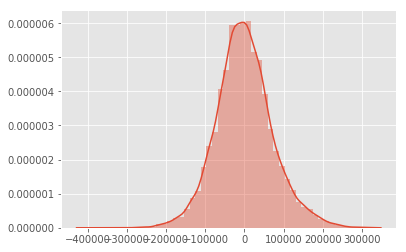

In [71]:
sns.distplot(model.resid)

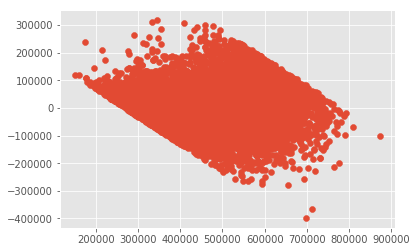

In [72]:
plt.scatter(model.fittedvalues, model.resid)

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


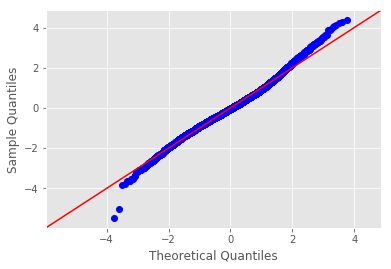

In [73]:
sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True).show()

The residual distribution is fairly bell-shaped and symmetrical, but kurtosis seems a little bit high. The QQ plot shows that there might be few outliers skewing the distribution. In the section below, I look into the data points of the biggest residuals. However, I couldn't identify an obvious pattern to classify them as outliers. It is possible that they are outliers, but due to reasons not identifiable in the dataset (ex. a house owned by a celebrity, etc).

### Further sanity check

Based on the final model above I will look into first few data points of the biggest residuals.

In [74]:
df_test = df

In [75]:
df_test['fitted'] = model.fittedvalues
df_test['resid'] = model.resid
df_test['abs_resid'] = abs(model.resid)
df_test['check'] = (df_test['price'] - df_test['fitted']) == df_test['resid']
test2 = df_test.sort_values(by='abs_resid', ascending=False).head(5)
list(test2['id'])

[3613600150, 7942601475, 5297200089, 8121100395, 2660500095]

In [76]:
test2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,neighborhood,price_q,fitted,resid,abs_resid,check
14821,3613600150,2015-01-05,300523.0,3,2.50,2370,6840,2.0,0.0,0.0,...,47.6503,-122.366,1590,4400,9,3,698829.260729,-398306.260729,398306.260729,True
19173,7942601475,2014-05-20,345600.0,5,3.50,2800,5120,2.5,0.0,0.0,...,47.6059,-122.310,1780,5120,7,4,711447.164211,-365847.164211,365847.164211,True
16255,5297200089,2015-04-15,664000.0,2,1.75,1720,5785,1.0,0.0,0.0,...,47.5554,-122.274,1680,5184,4,8,346360.024936,317639.975064,317639.975064,True
18691,8121100395,2015-03-11,645000.0,4,1.50,1600,6180,1.5,0.0,0.0,...,47.5681,-122.285,1410,6180,4,8,333906.429700,311093.570300,311093.570300,True
15556,2660500095,2015-05-06,715000.0,4,1.00,1710,6050,1.5,0.0,0.0,...,47.5569,-122.288,1560,4950,4,9,407982.744065,307017.255935,307017.255935,True


In [78]:
# run the regression again without the the 5 biggest residuals
df2 = df[-df['id'].isin(list(test2['id']))]
df2_target = df2['price']
df2_predictors = df2.drop(['id','date','price','waterfront', 'zipcode', 'price_q'], axis=1)
df2_predictors = pd.concat([df2_predictors, dummies(df2, cols)], axis=1)

df2_predictors = df2_predictors.drop(drop_col, axis=1) ## drop correlated columns
df2_log = df2_predictors.drop(log_col, axis=1)

X_fin2 = df2_log[final_col]
X_int2 = sm.add_constant(X_fin2)
model2 = sm.OLS(df2_target, X_int2).fit()
model2.summary()

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     2892.
Date:                Fri, 28 Jun 2019   Prob (F-statistic):               0.00
Time:                        18:58:19   Log-Likelihood:            -1.5700e+05
No. Observations:               12450   AIC:                         3.140e+05
Df Residuals:                   12439   BIC:                         3.141e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.949e+07   8.03e+05    -24.281      0.000   -2.11e+07   -1.79e+07
sqft_living       86.4768      1.671     51.758      0.000      83.202      89.752
view            2.503e+04   1308.221     19.131      0.000    2.25e+04    2.76e+04
condition       1.375e+04   1135.451     12.111      0.000    1.15e+04     1.6e+04
grade           3.965e+04   1225.211     32.362      0.000    3.72e+04    4.21e+04
yr_built        -684.5161     30.276    -22.609      0.000    -743.861    -625.171
lat             8.017e+04   6634.413     12.084      0.000    6.72e+04    9.32e+04
long           -1.369e+05   6315.091    -21.684      0.000   -1.49e+05   -1.25e+05
sqft_living15     21.8271      2.049     10.654      0.000      17.811      25.843
neighborhood    3.749e+04    397.111     94.397      0.000    3.67e+04    3.83e+04
waterfront_1.0  1.473e+05   2.79e+04      5.281      0.000    9.26e+04    2.02e+05
==============================================================================
Omnibus:                      241.830   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              347.620
Skew:                           0.225   Prob(JB):                     3.28e-76
Kurtosis:                       3.683   Cond. No.                     4.11e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.11e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
model.params

const            -1.945865e+07
sqft_living       8.633285e+01
view              2.504438e+04
condition         1.368171e+04
grade             3.921167e+04
yr_built         -6.828856e+02
lat               8.043441e+04
long             -1.365656e+05
sqft_living15     2.215987e+01
neighborhood      3.742951e+04
waterfront_1.0    1.470875e+05
dtype: float64

In [80]:
model2.params

const            -1.949171e+07
sqft_living       8.647685e+01
view              2.502799e+04
condition         1.375184e+04
grade             3.965016e+04
yr_built         -6.845161e+02
lat               8.017260e+04
long             -1.369358e+05
sqft_living15     2.182706e+01
neighborhood      3.748592e+04
waterfront_1.0    1.472554e+05
dtype: float64

The parameters did not change much.

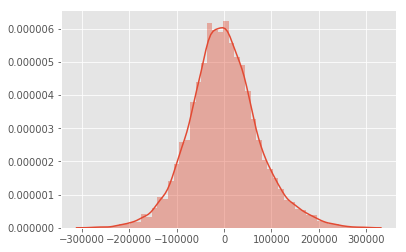

In [81]:
sns.distplot(model2.resid)

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


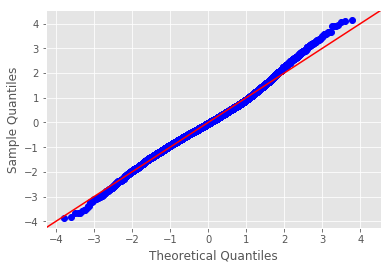

In [82]:
sm.graphics.qqplot(model2.resid, dist=stats.norm, line='45', fit=True).show()

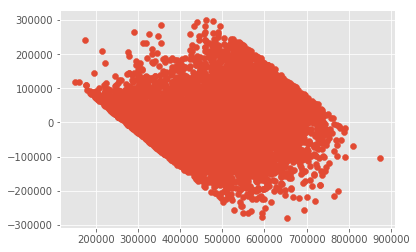

In [83]:
plt.scatter(model2.fittedvalues, model2.resid)

### Cross validation

In [84]:
cv_5_results = np.mean(cross_val_score(linreg, X_fin, df_target, cv=5, scoring="neg_mean_squared_error"))
cv_10_results = np.mean(cross_val_score(linreg, X_fin, df_target, cv=10, scoring="neg_mean_squared_error"))
cv_20_results = np.mean(cross_val_score(linreg, X_fin, df_target, cv=20, scoring="neg_mean_squared_error"))
cv_30_results = np.mean(cross_val_score(linreg, X_fin, df_target, cv=30, scoring="neg_mean_squared_error"))

In [85]:
print(cv_5_results*-1)
print(cv_10_results*-1)
print(cv_20_results*-1)
print(cv_30_results*-1)

5358630315.69039
5347385517.768089
5327934287.584622
5322705506.27074


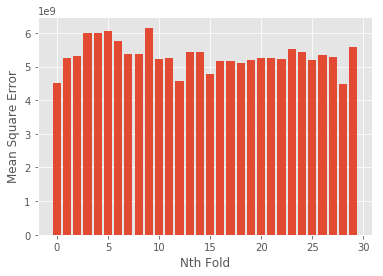

In [86]:
cval = list(cross_val_score(linreg, X_fin, df_target, cv=30, scoring="neg_mean_squared_error")*-1)
plt.bar(list(range(30)), height=cval)
plt.xlabel('Nth Fold')
plt.ylabel('Mean Square Error')
plt.show()

Even with 30 folds, the mean squared errors of the model don't vary much, suggesting that the model is not over-fitting the data.

## Housing Price Predictor

In [87]:
model.params

const            -1.945865e+07
sqft_living       8.633285e+01
view              2.504438e+04
condition         1.368171e+04
grade             3.921167e+04
yr_built         -6.828856e+02
lat               8.043441e+04
long             -1.365656e+05
sqft_living15     2.215987e+01
neighborhood      3.742951e+04
waterfront_1.0    1.470875e+05
dtype: float64